In [72]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
%run image_pyramid.ipynb
%run Histogram_Equilization.ipynb
%run Haar_Cascades.ipynb
%run TBE_Branches.ipynb
from sklearn.preprocessing import LabelEncoder

In [106]:
import cv2
import os
import splitfolders

cam = cv2.VideoCapture(0)
cam.set(3, 640) # set video width
cam.set(4, 480) # set video height

face_detector = cv2.CascadeClassifier('C:/Users/Dr.K.Latha.MD/Downloads/project/haarcascade_frontalface_default.xml')

# For each person, enter one numeric face id
face_id = input('\n enter user id end press <return> ==>  ')
face__name = input("\n enter user name end press <return> ==>  ")

out_path = "C:/Users/Dr.K.Latha.MD/review3_org_/data/"
path1 = os.path.join(out_path, face__name)
os.mkdir(path1)

print("\n [INFO] Initializing face capture. Look the camera and wait ...")
# Initialize individual sampling face count
count = 0

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('live.avi',fourcc, 20.0, (640,480))

while(True):

    ret, img = cam.read()
    
    if ret==True:
        out.write(img)
        
    img = cv2.flip(img, 1) # flip video image vertically
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:

        #cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        count += 1

        # Save the captured image into the datasets folder
        #out_path = 'C:/Users/Dr.K.Latha.MD/review2_org/frames'
        #out_path = 'C:/Users/Dr.K.Latha.MD/review3_org_/'+ face__name
        
        frame_name = 'User.'+str(face_id)+ '.' + str(count) +'.jpg'
        cv2.imwrite(os.path.join(path1, frame_name), img)
        
        cv2.imwrite("dataset/User." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])
        
        cv2.imshow('image', img)

    k = cv2.waitKey(100) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break
    elif count >= 64: # Take 64 face sample and stop video
         break

# Do a bit of cleanup
splitfolders.ratio('data/', output="output", seed=1337, ratio=(.8, 0.2))
print("\n [INFO] Exiting Program and cleanup stuff")
cam.release()
out.release()
cv2.destroyAllWindows()




 enter user id end press <return> ==>  1

 enter user name end press <return> ==>  adhi

 [INFO] Initializing face capture. Look the camera and wait ...

 [INFO] Exiting Program and cleanup stuff


In [109]:
face_cascade = cv2.CascadeClassifier('haar.xml')
dirs = "output/train/"
img_size = 60

data = []
for name in os.listdir(dirs):
    for f in os.listdir(dirs+name):
        f = cv2.imread(os.path.join(dirs+name, f))
        faces = face_cascade.detectMultiScale(f,1.3,5)
        for x,y,w,h in faces:
            img = f[y:y+h, x:x+w]
            img = cv2.resize(img, (img_size,img_size))
            data.append((img, name))
            
df = pd.DataFrame(data, columns=["image", "name"])
print("Length:",len(df))

Length: 100


Name:  adhi
(60, 60, 3)


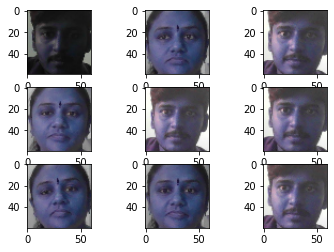

In [110]:
idx = 34
row = df.iloc[idx, :]
print("Name: ", row["name"])
print(row.image.shape)
for i in range(9):
  row = df.iloc[np.random.randint(0, len(df)), :]
  plt.subplot(3,3,i+1)
  plt.imshow(row.image)

In [111]:
dirs = "output/val/"

data = []
for name in os.listdir(dirs):
    for f in os.listdir(dirs+name):
        f = cv2.imread(os.path.join(dirs+name, f))
        faces = face_cascade.detectMultiScale(f,1.3,5)
        for x,y,w,h in faces:
            img = f[y:y+h, x:x+w]
            img = cv2.resize(img, (img_size,img_size))
            data.append((img, name))
            
df_test = pd.DataFrame(data, columns=["image", "name"])
print("Test size: ", len(df_test))

Test size:  26


In [112]:
le = LabelEncoder()
le.fit(df["name"].values)

LabelEncoder()

In [113]:
x_train = list(df.image.values)
x_train = np.array(x_train)
x_train = x_train/255
print(x_train.shape)

y_train = le.transform(df["name"].values)
print(y_train.shape)

(100, 60, 60, 3)
(100,)


In [114]:
x_test = list(df_test.image.values)
x_test = np.array(x_test)
x_test = x_test/255
print(x_test.shape)

y_test = le.transform(df_test["name"].values)
print(y_test.shape)

(26, 60, 60, 3)
(26,)


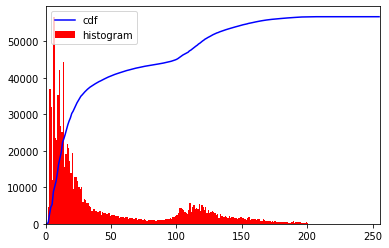

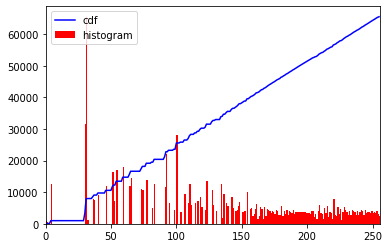

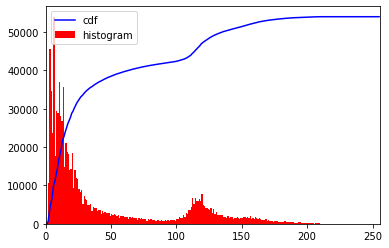

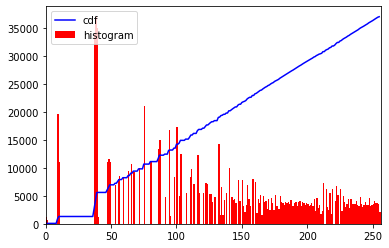

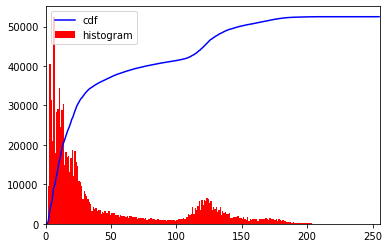

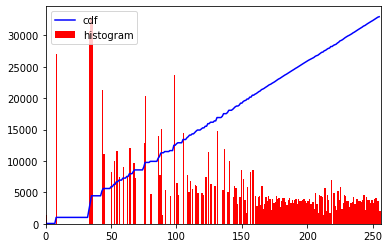

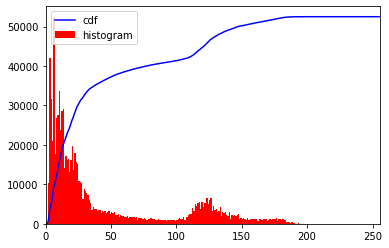

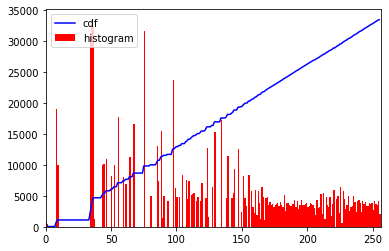

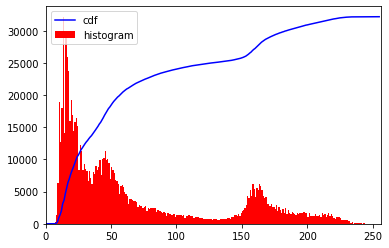

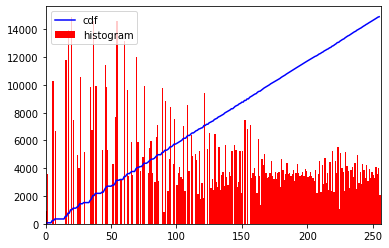

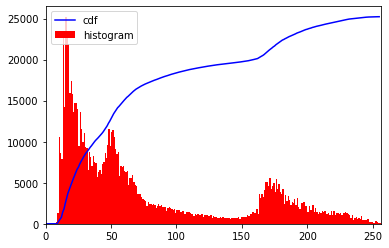

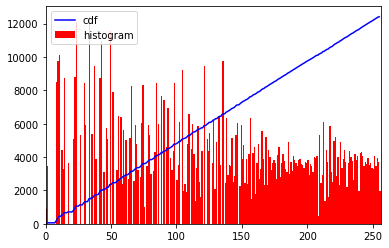

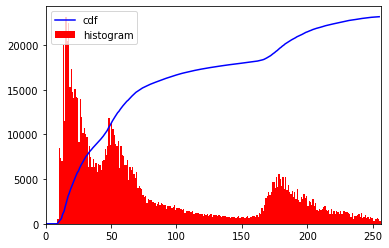

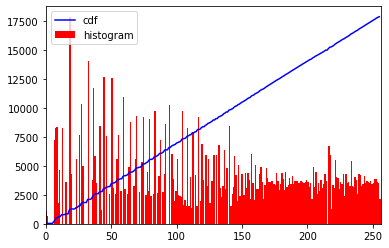

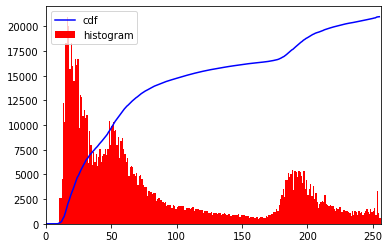

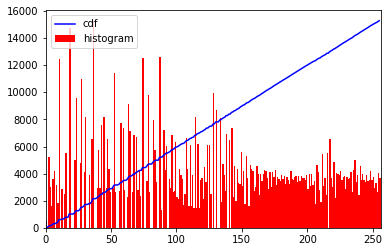

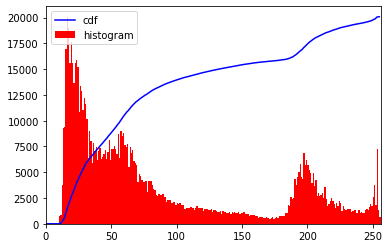

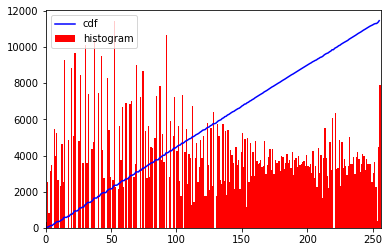

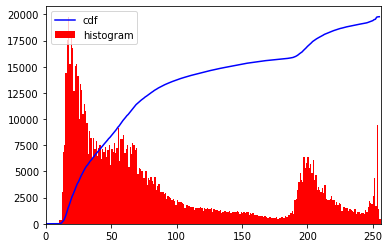

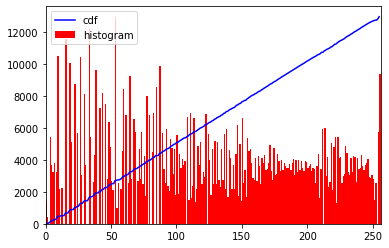

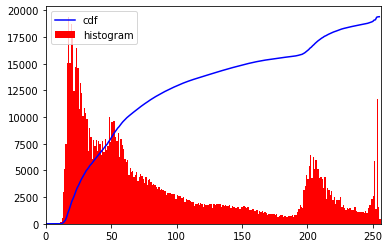

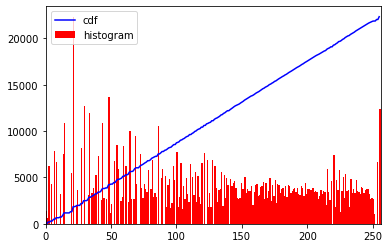

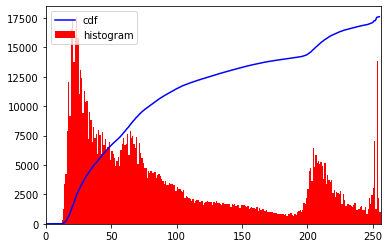

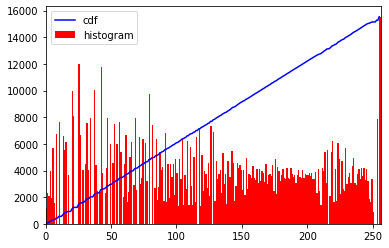

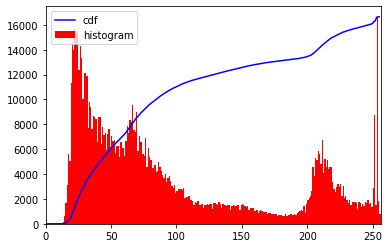

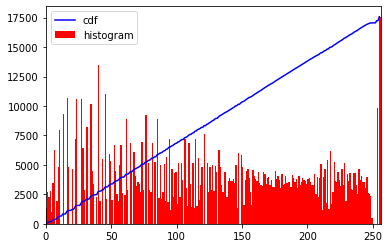

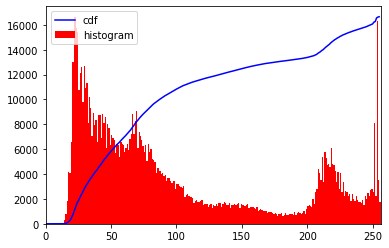

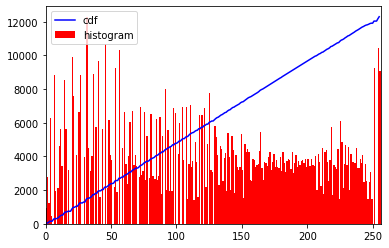

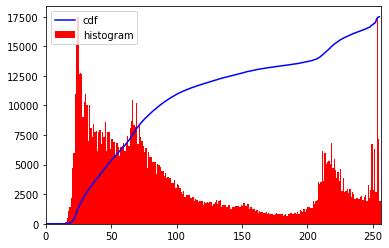

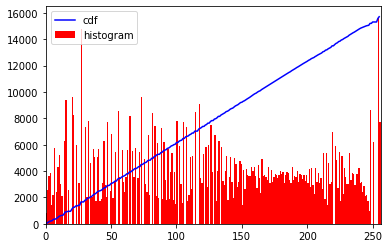

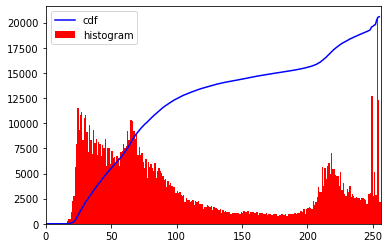

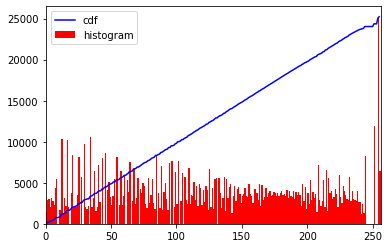

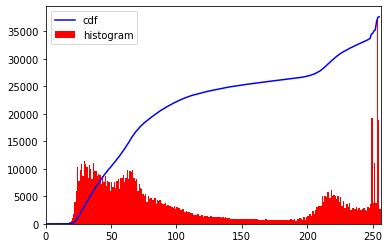

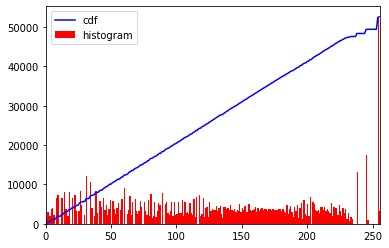

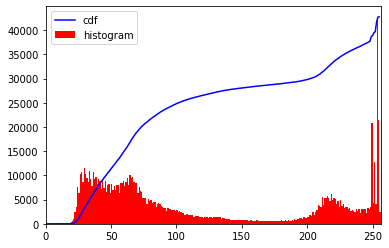

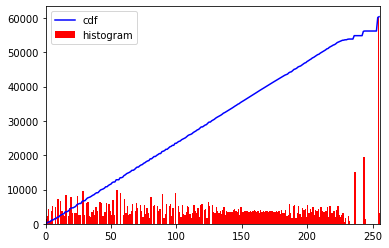

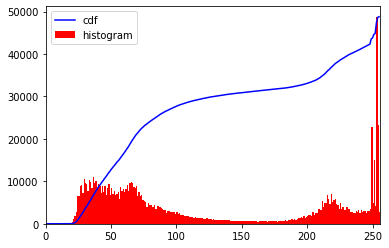

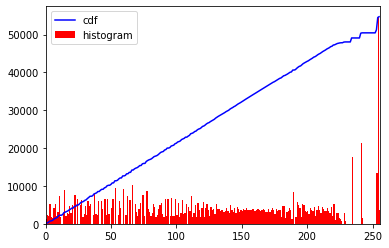

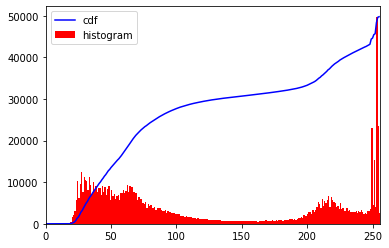

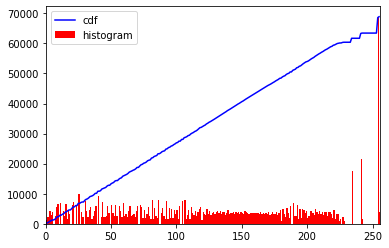

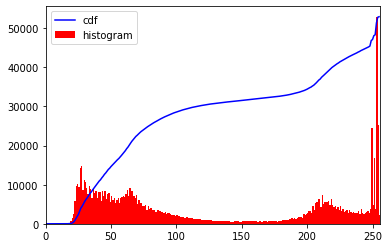

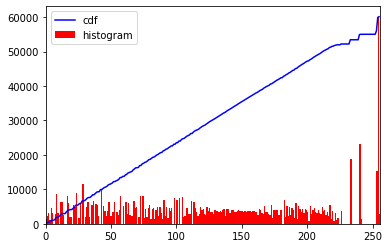

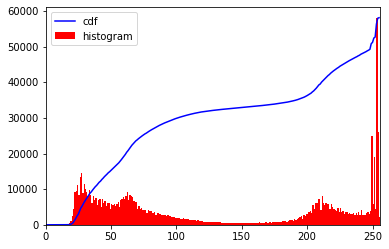

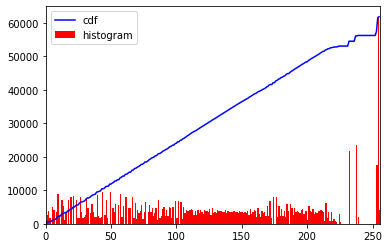

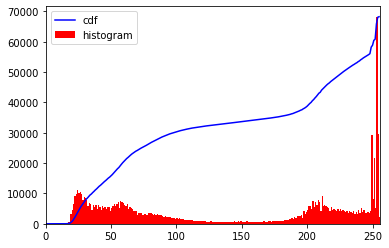

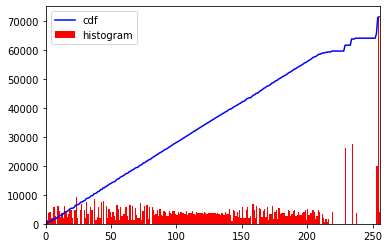

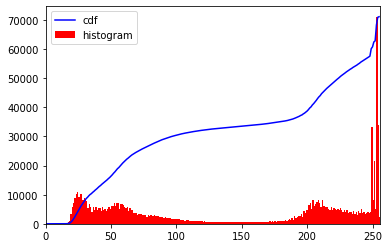

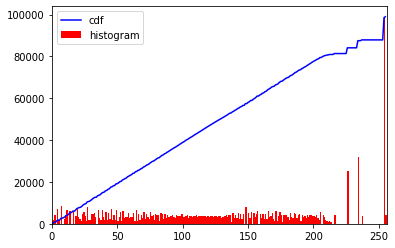

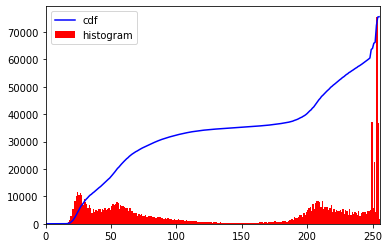

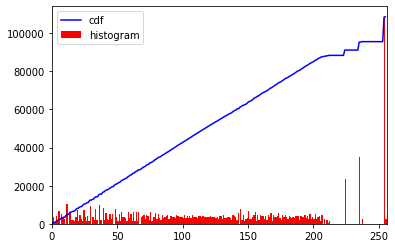

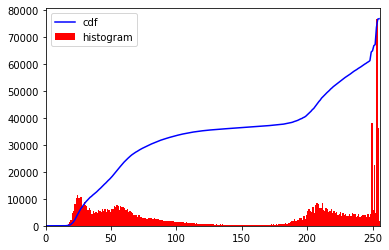

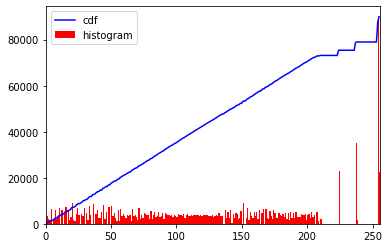

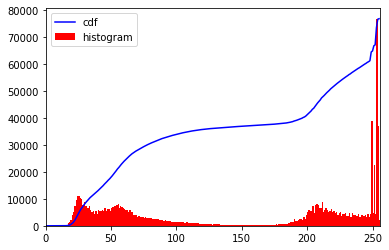

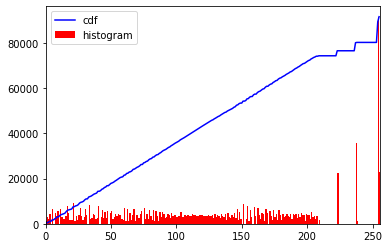

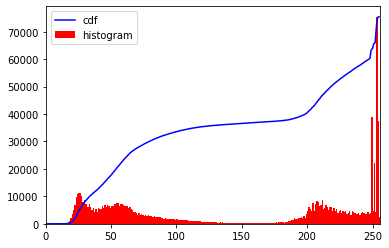

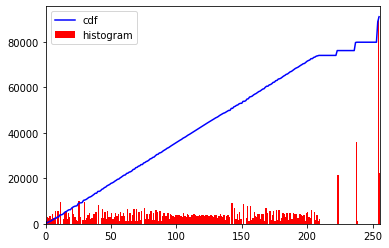

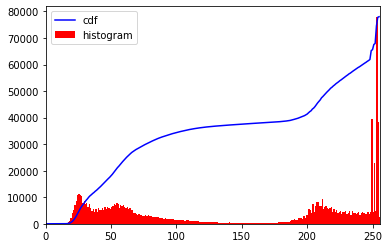

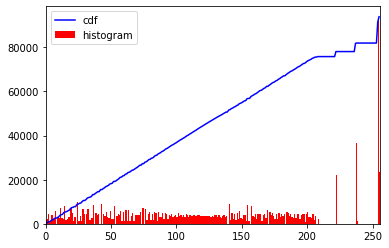

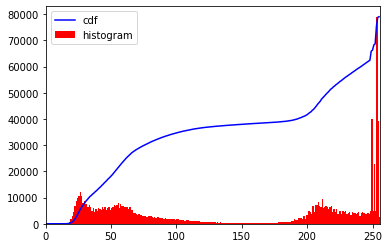

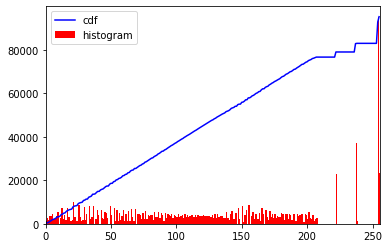

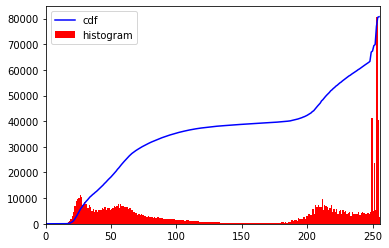

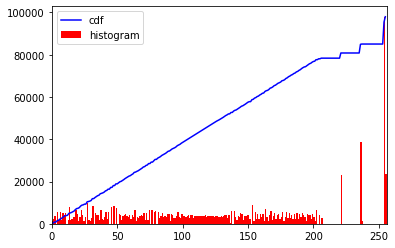

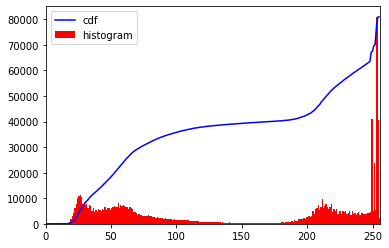

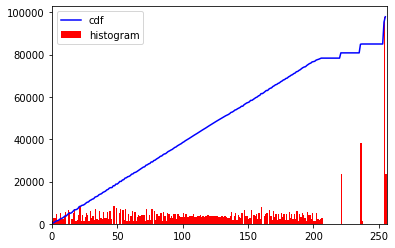

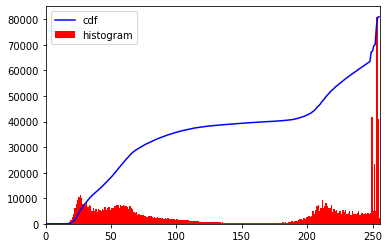

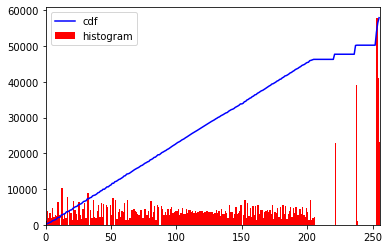

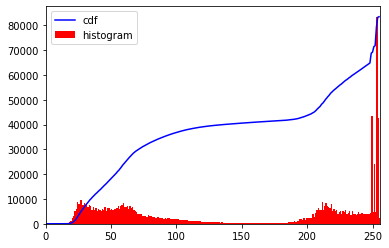

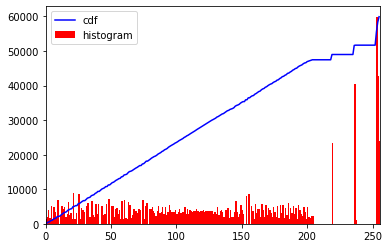

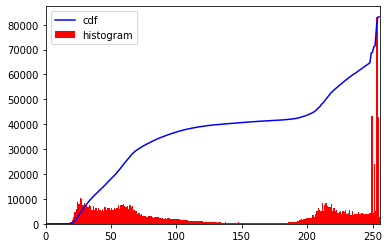

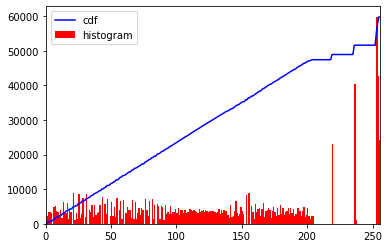

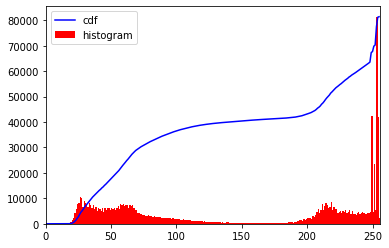

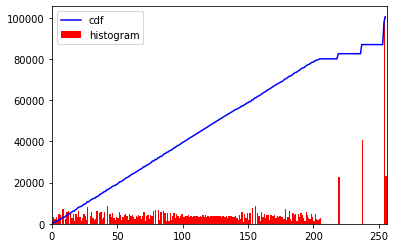

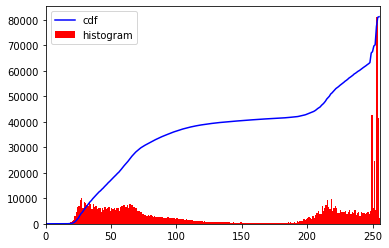

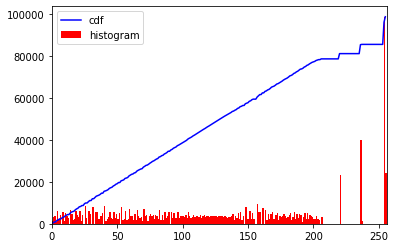

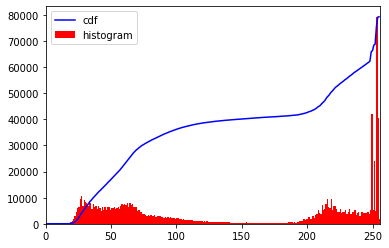

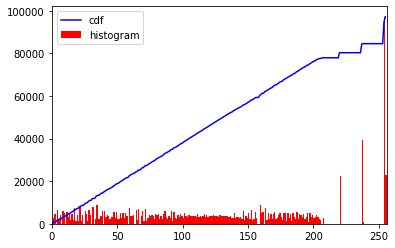

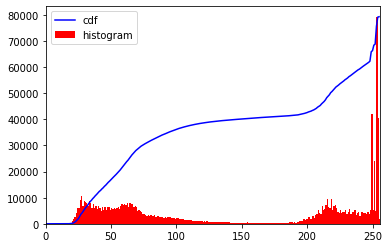

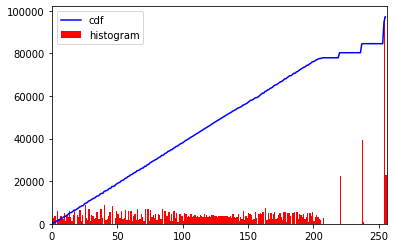

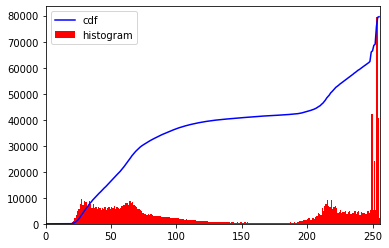

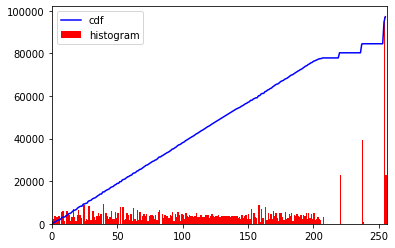

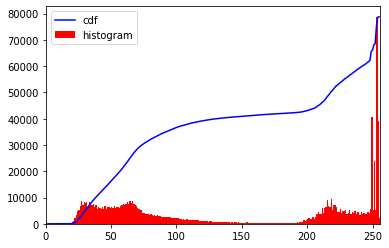

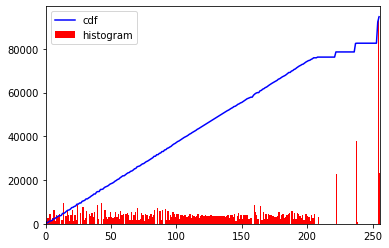

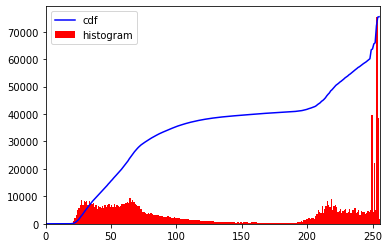

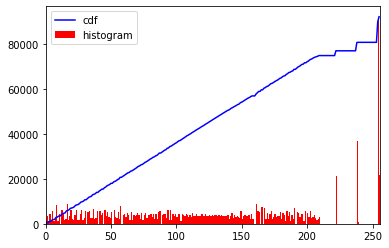

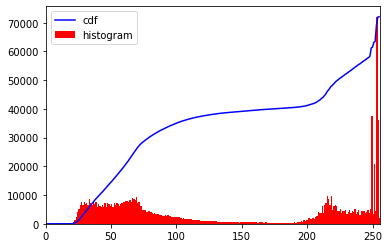

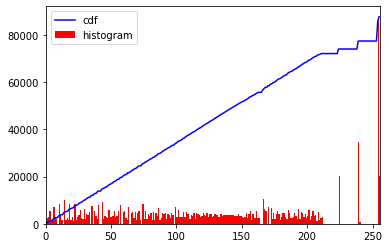

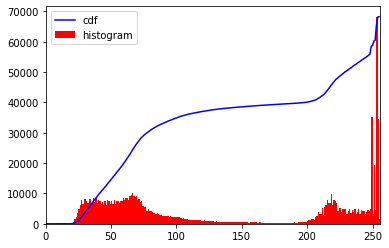

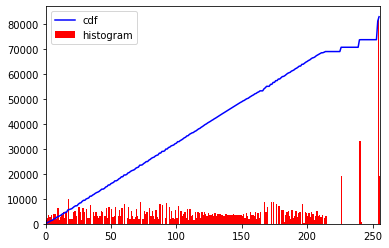

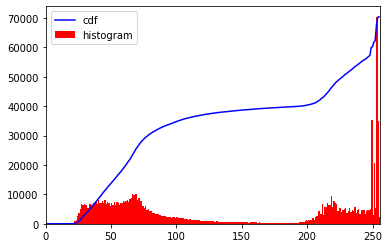

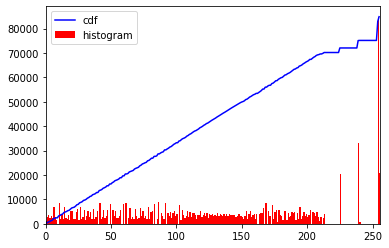

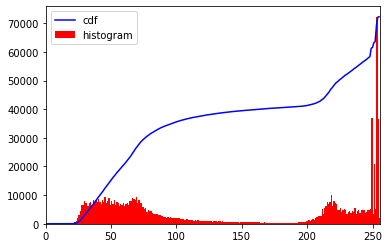

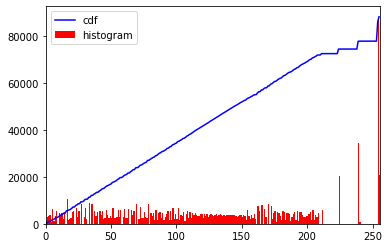

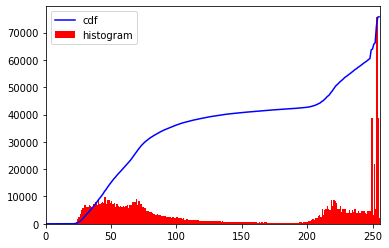

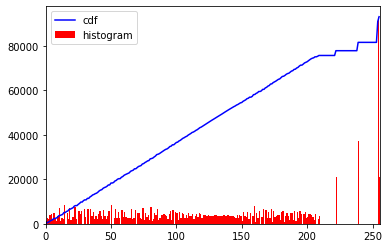

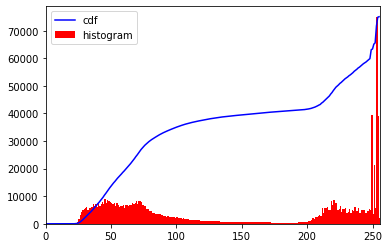

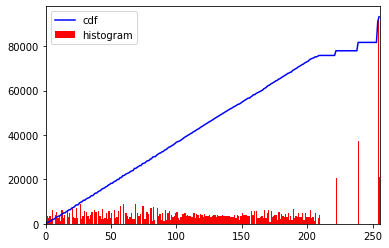

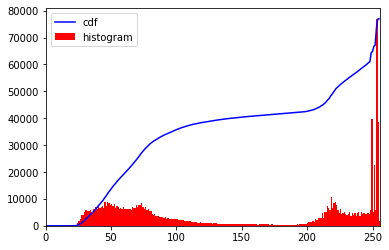

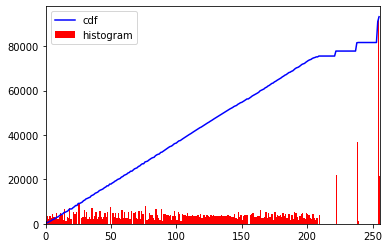

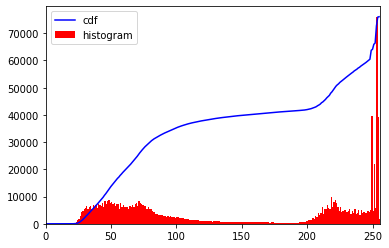

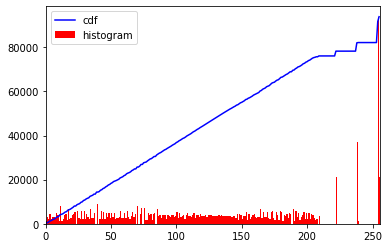

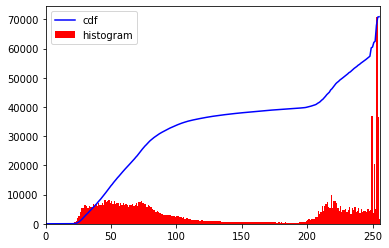

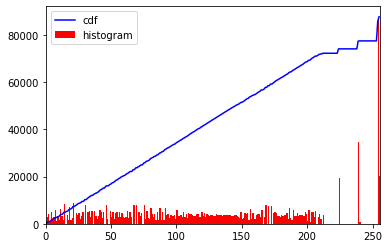

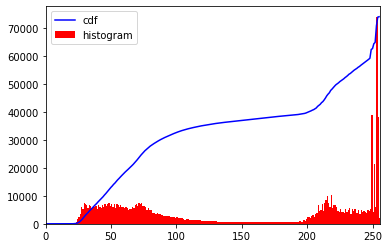

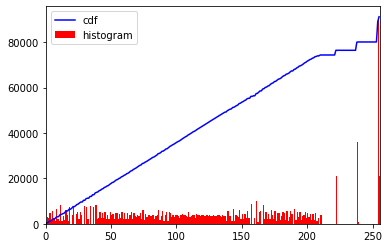

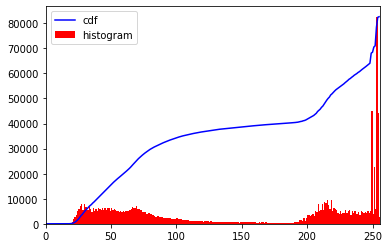

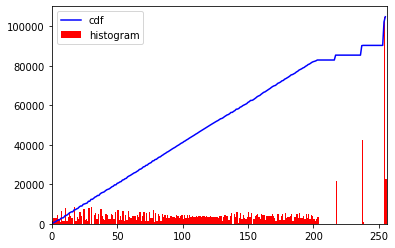

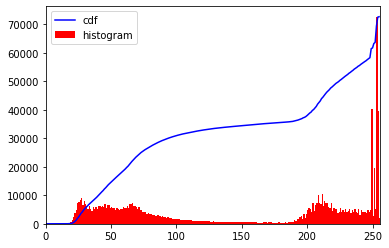

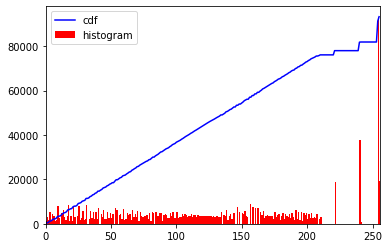

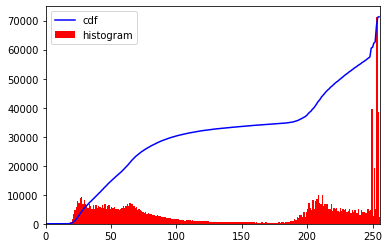

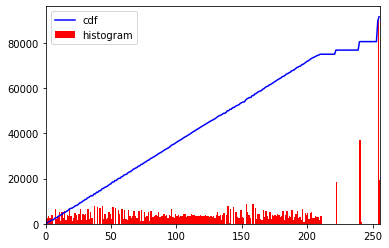

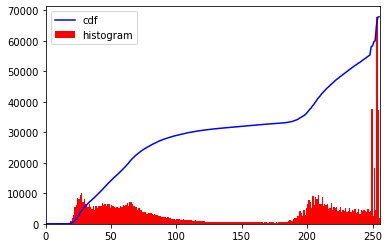

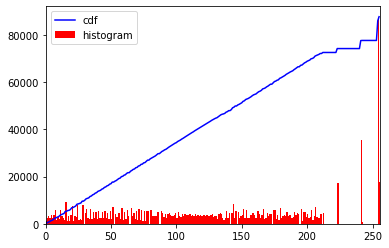

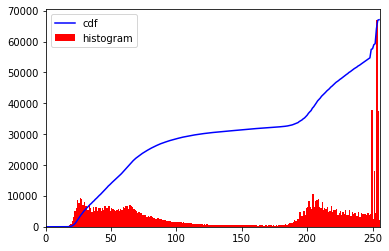

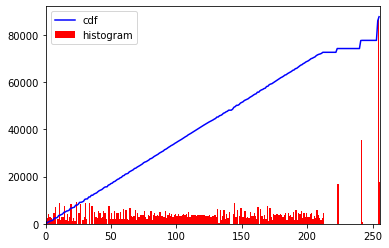

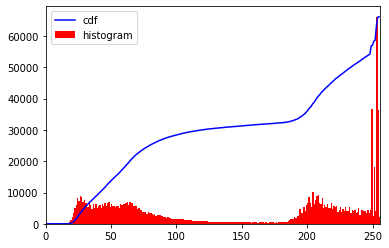

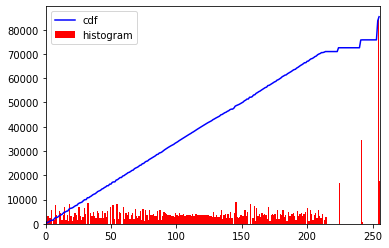

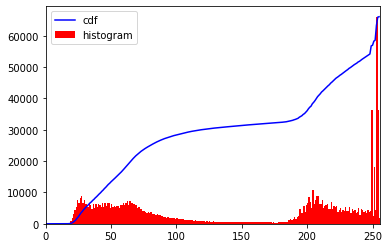

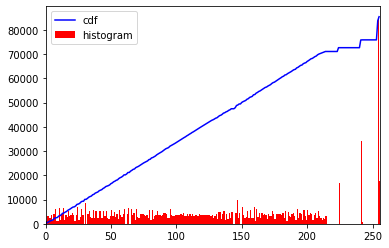

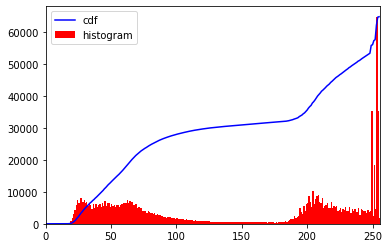

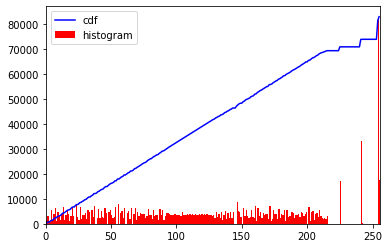

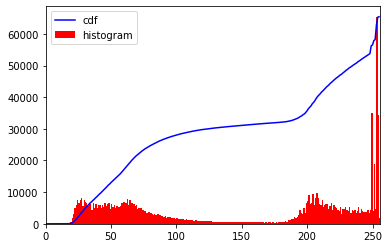

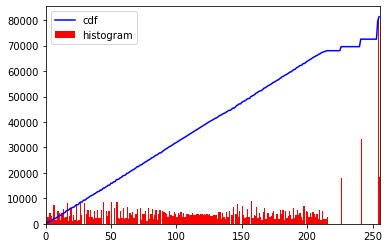

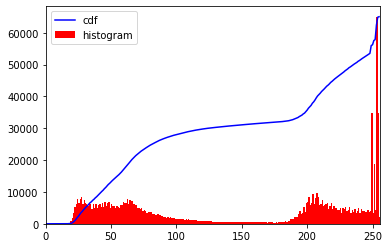

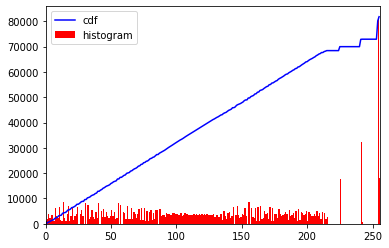

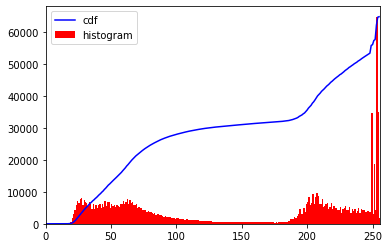

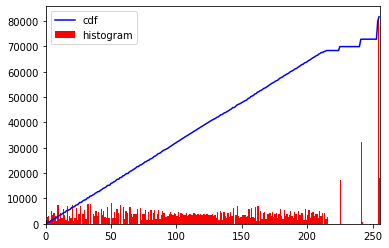

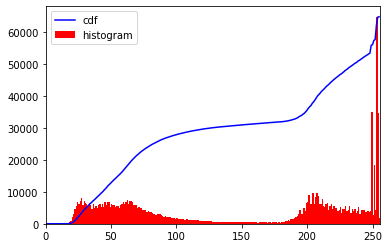

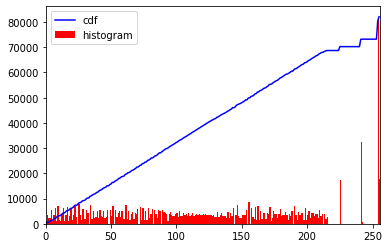

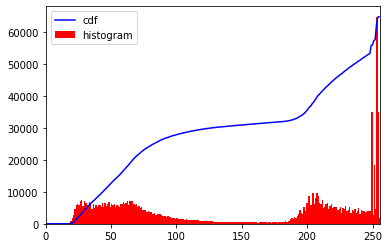

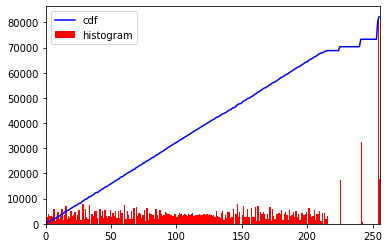

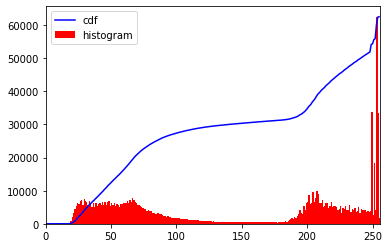

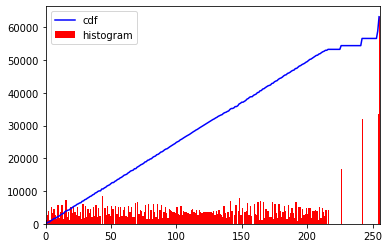

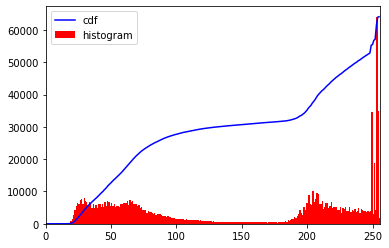

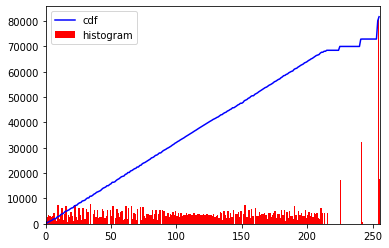

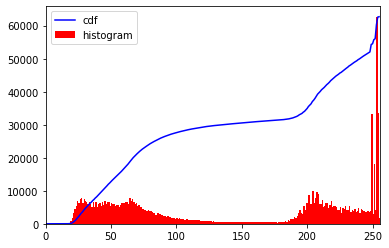

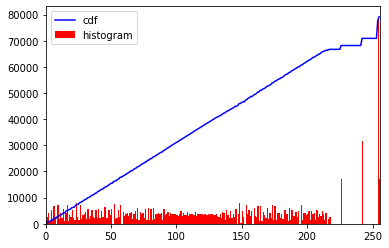

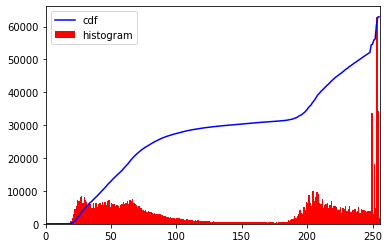

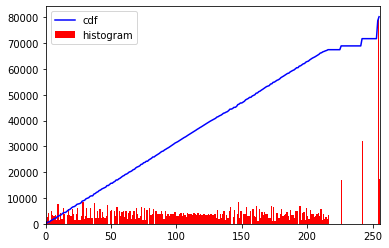

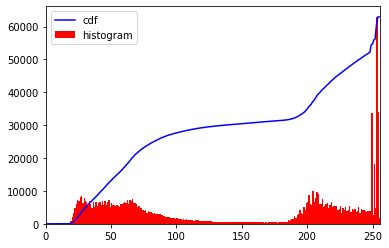

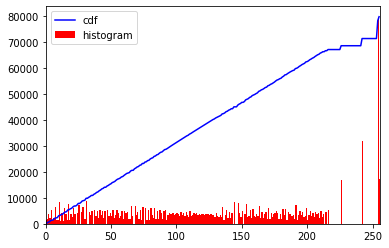

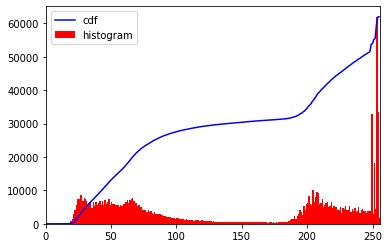

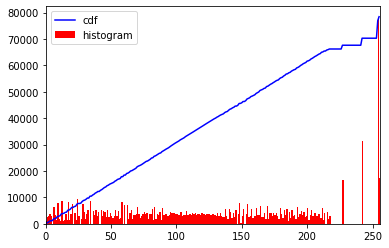

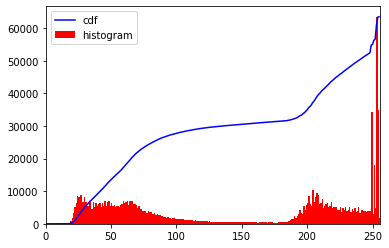

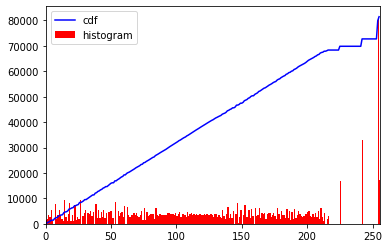

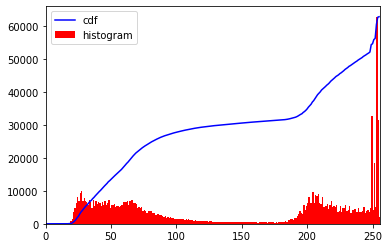

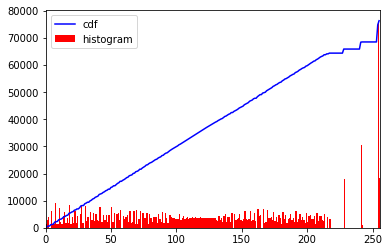

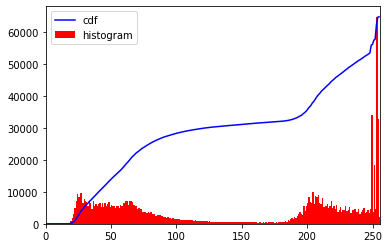

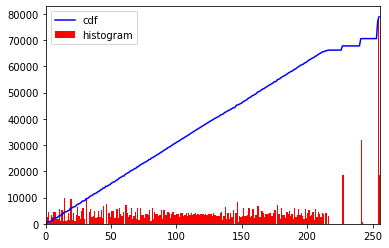

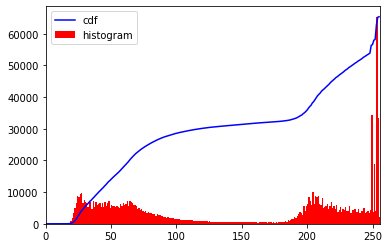

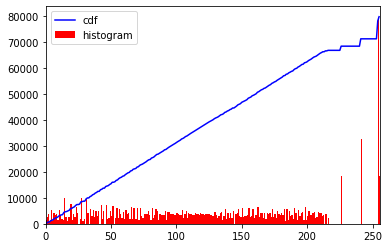

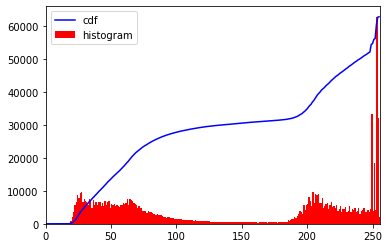

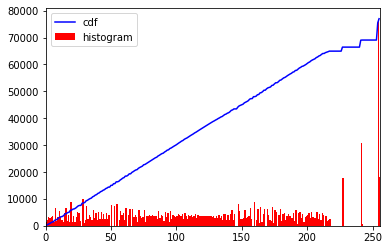

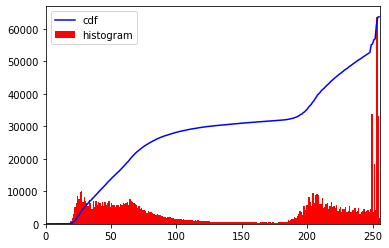

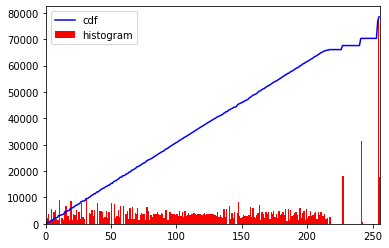

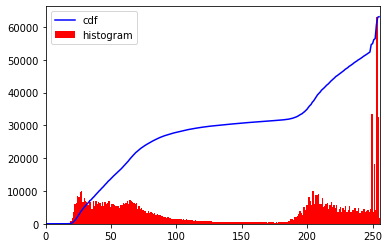

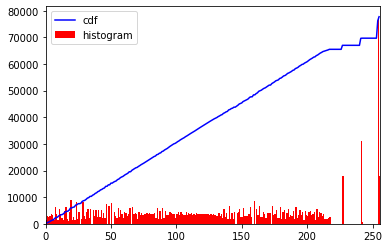

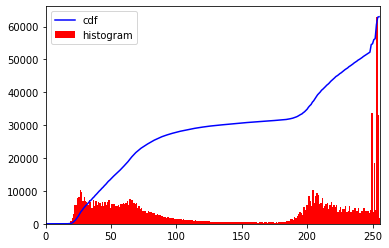

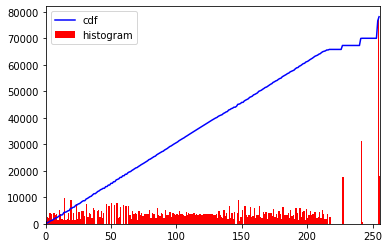

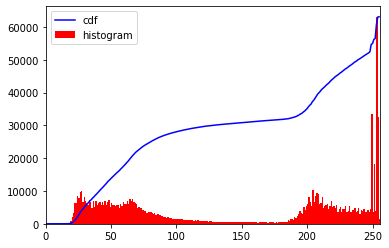

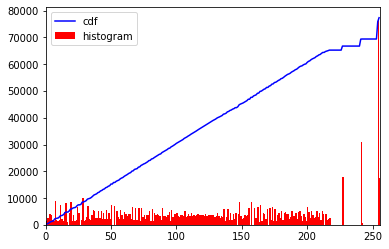

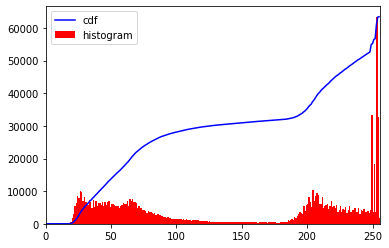

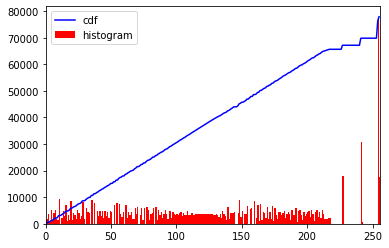

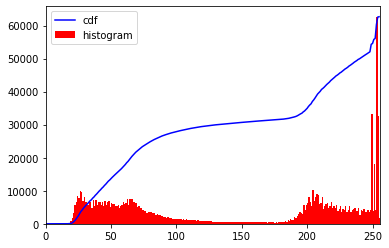

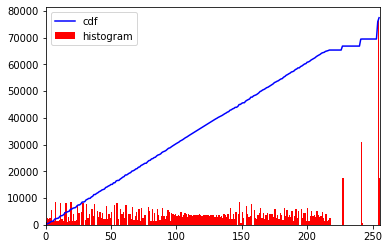

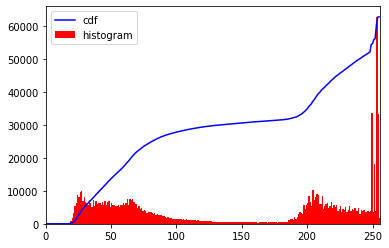

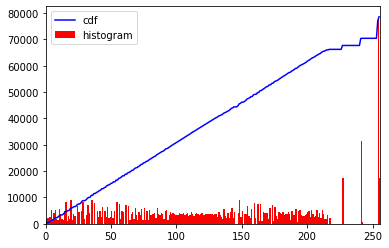

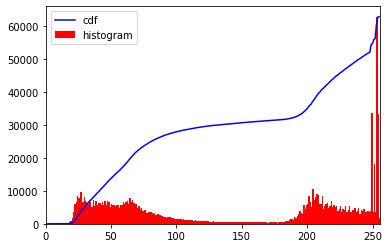

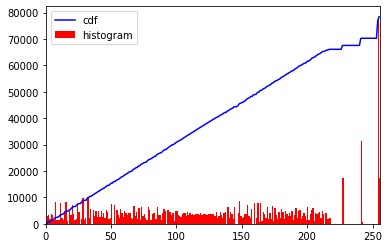

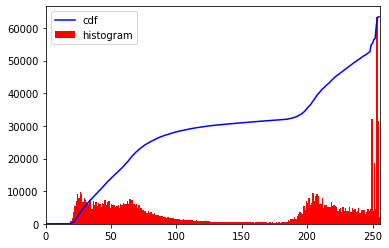

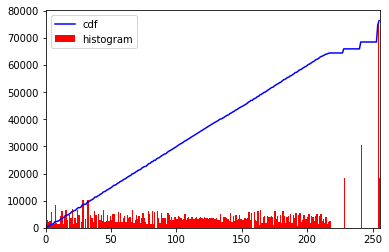

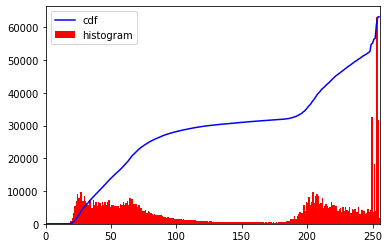

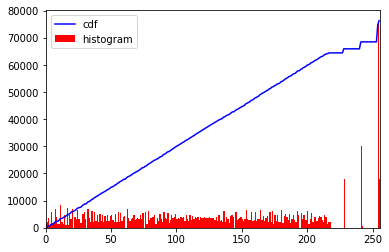

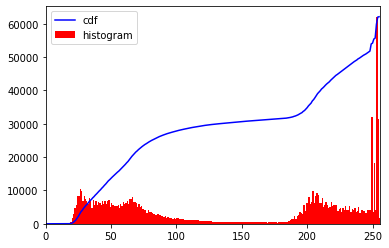

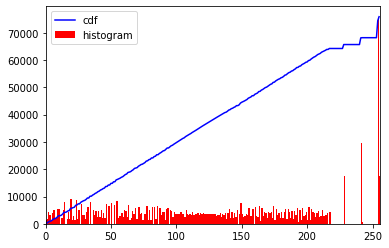

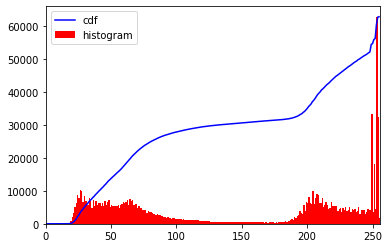

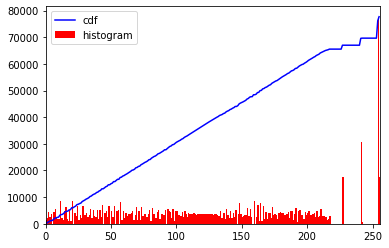

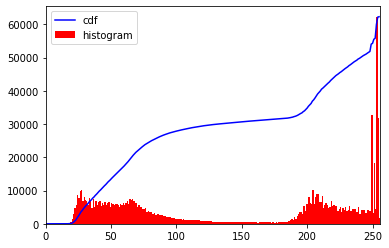

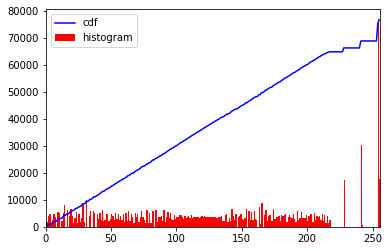

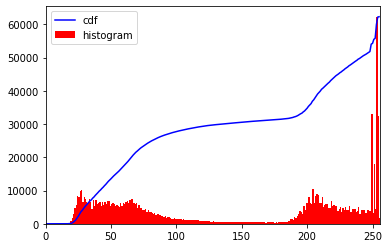

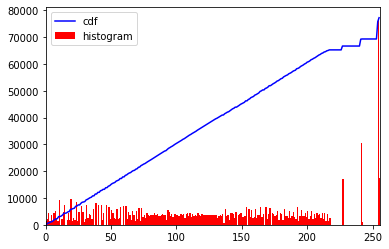

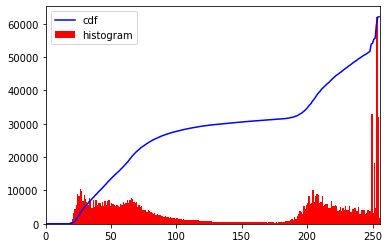

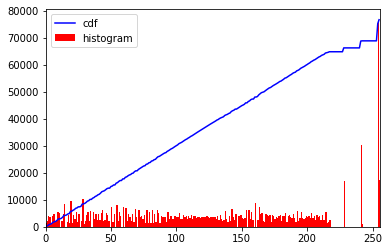

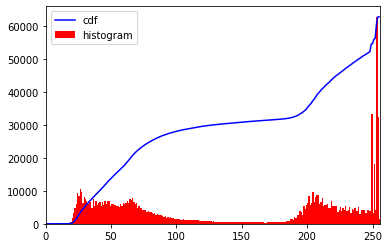

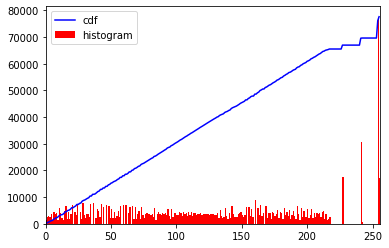

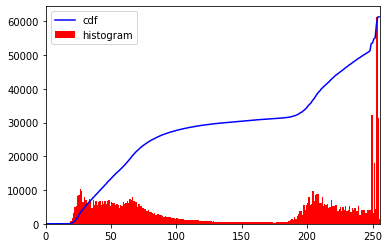

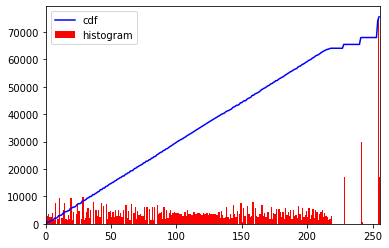

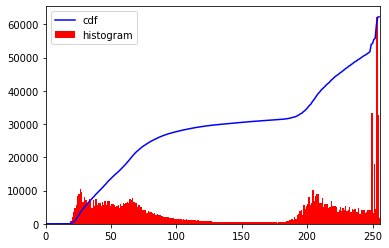

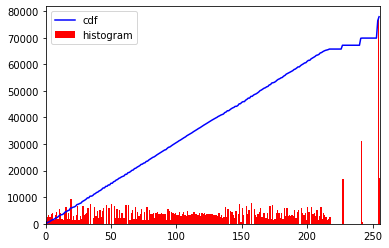

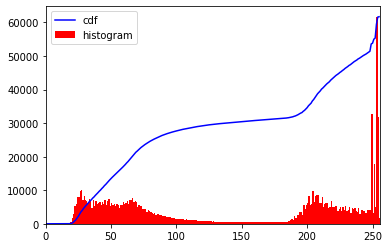

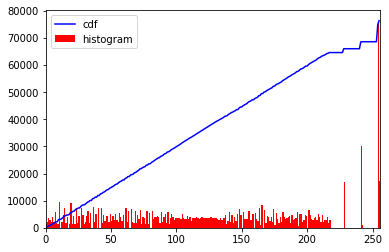

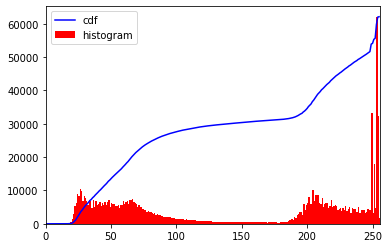

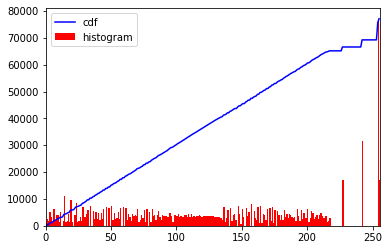

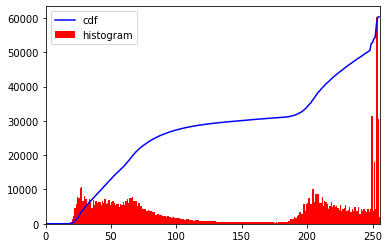

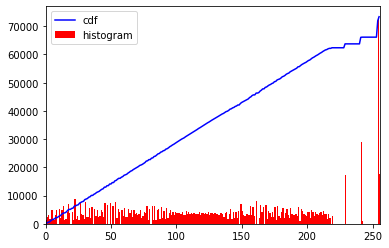

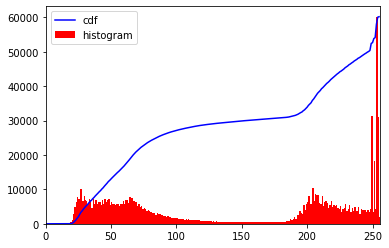

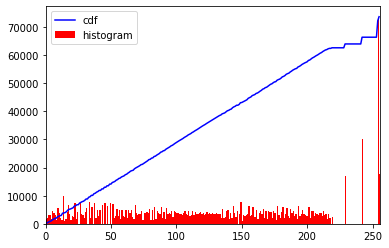

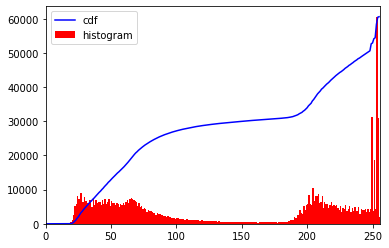

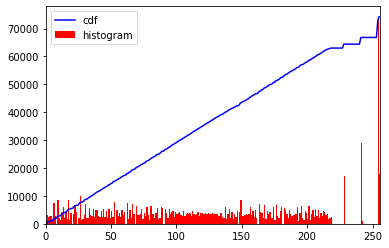

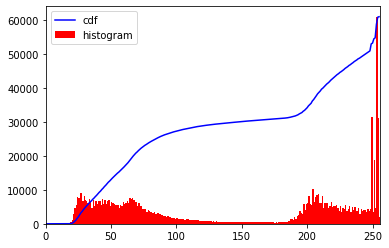

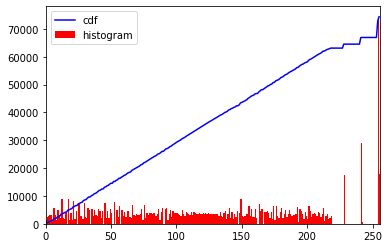

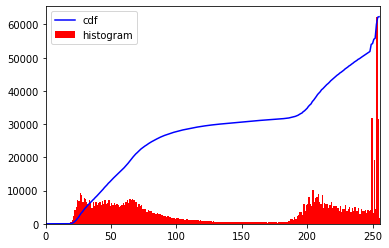

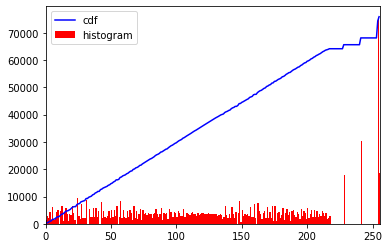

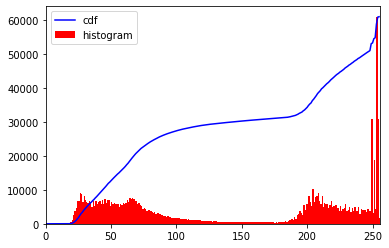

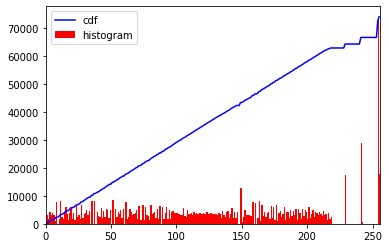

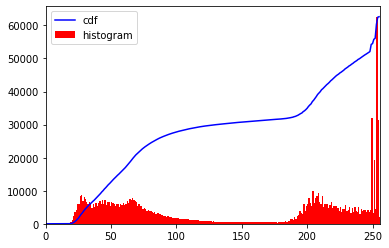

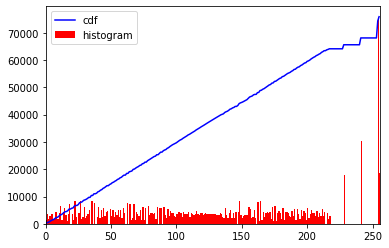

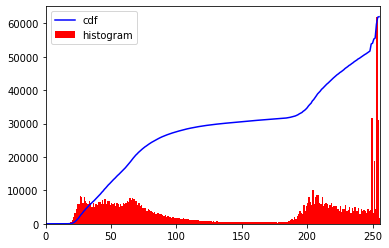

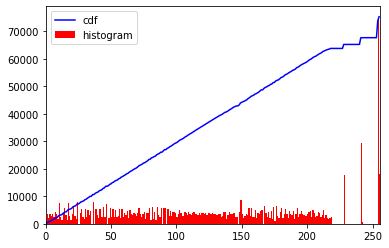

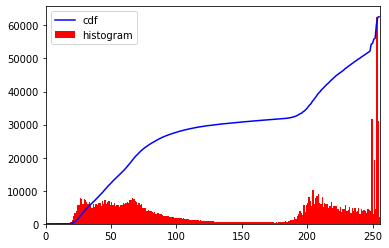

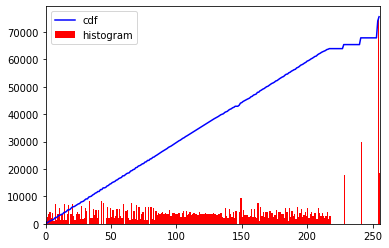

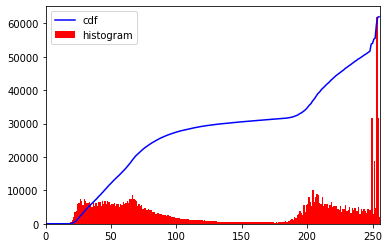

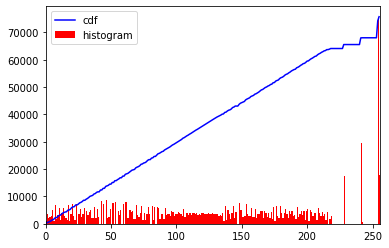

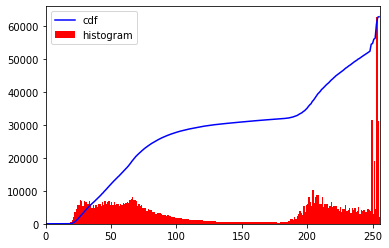

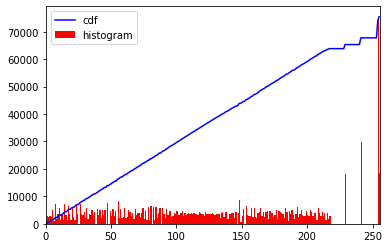

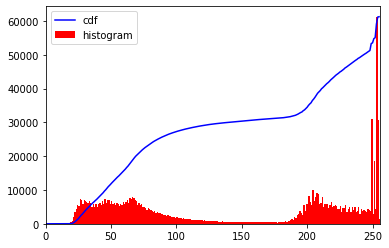

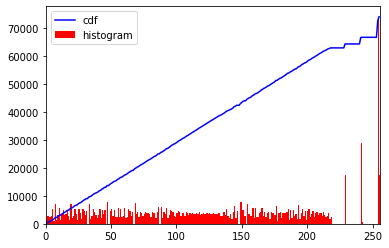

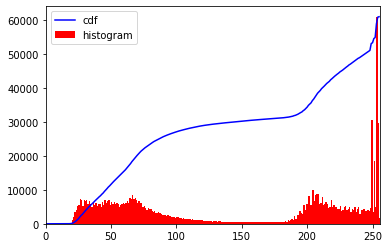

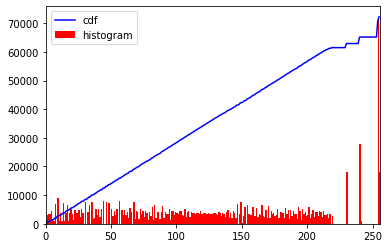

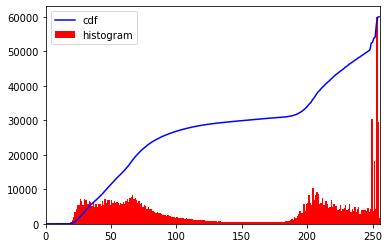

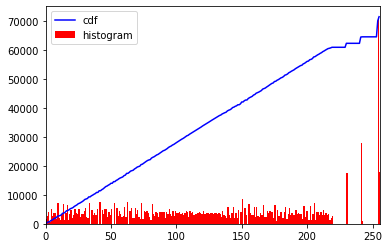

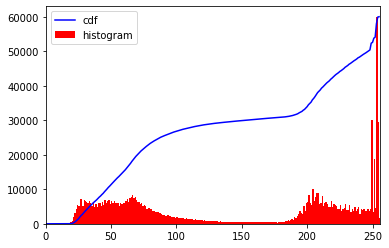

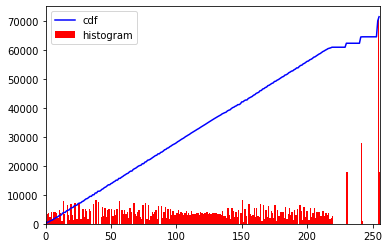

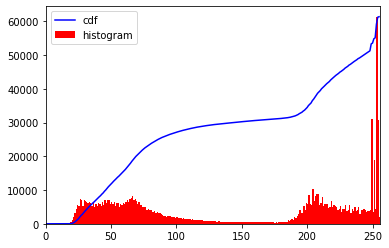

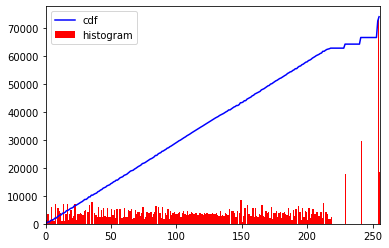

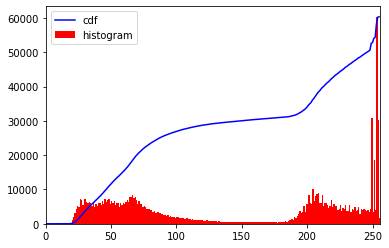

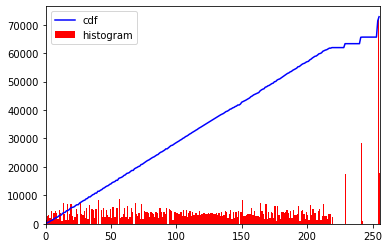

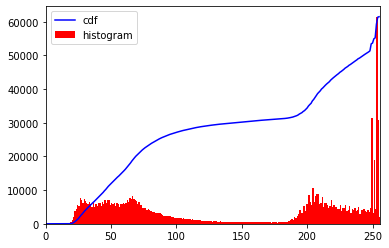

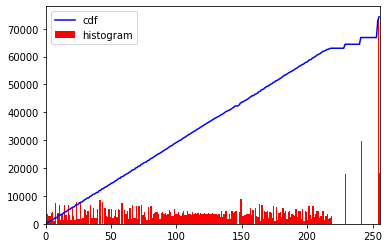

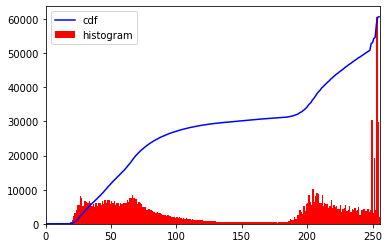

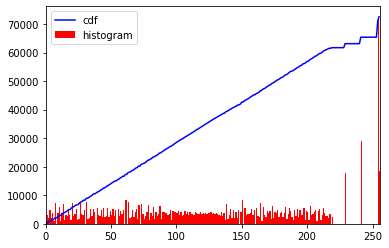

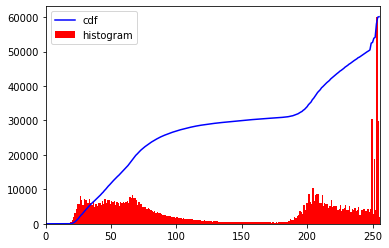

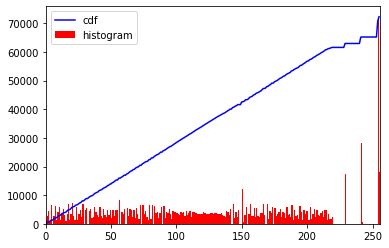

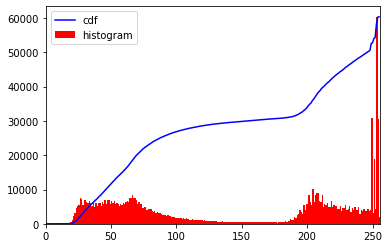

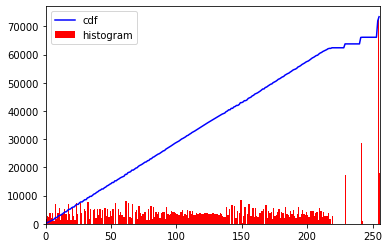

--- 112.49051332473755 seconds ---
(1944, 117)
117


In [115]:
cap = cv2.VideoCapture('live.avi') 
arr = np.empty((0, 1944), int)   #initializing 1944 dimensional array to store 'flattened' color histograms
D=dict()   #to store the original frame (array)
count=0    #counting the number of frames
frame_=0
start_time = time.time()
while cap.isOpened():
    
    # Read the video file.
    ret, frame = cap.read()
    
    # If we got frames.
    if ret == True:
        
        #Image Pyramiding
        frame_ = imgPyramid(frame)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  #since cv reads frame in bgr order so rearraning to get frames in rgb order
        #Histogram Equilization
        frame_rgb_ = hist_equilization(frame)
        
        D[count] = frame_rgb   #storing each frame (array) to D , so that we can identify key frames later 
        
        #dividing a frame into 3*3 i.e 9 blocks
        height, width, channels = frame_rgb.shape

        if height % 3 == 0:
            h_chunk = int(height/3)
        else:
            h_chunk = int(height/3) + 1

        if width % 3 == 0:
            w_chunk = int(width/3)
        else:
            w_chunk = int(width/3) + 1

        h=0
        w= 0 
        feature_vector = []
        for a in range(1,4):
            h_window = h_chunk*a
            for b in range(1,4):
                frame = frame_rgb[h : h_window, w : w_chunk*b , :]
                hist = cv2.calcHist(frame, [0, 1, 2], None, [6, 6, 6], [0, 256, 0, 256, 0, 256])#finding histograms for each block  
                hist1= hist.flatten()  #flatten the hist to one-dimensinal vector 
                feature_vector += list(hist1)
                w = w_chunk*b
                
            h = h_chunk*a
            w= 0

                
        arr =np.vstack((arr, feature_vector )) #appending each one-dimensinal vector to generate N*M matrix (where N is number of frames
          #and M is 1944) 
        count+=1
    else:
        break

print("--- %s seconds ---" % (time.time() - start_time))

final_arr = arr.transpose() #transposing so that i will have all frames in columns i.e M*N dimensional matrix 
#where M is 1944 and N is number of frames
print(final_arr.shape)
print(count)


In [116]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds, eigs
A = csc_matrix(final_arr, dtype=float)

u, s, vt = svds(A, k = 63)


In [117]:
print(u.shape, s.shape, vt.shape)

(1944, 63) (63,) (63, 117)


In [118]:
y__act = ["1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "2", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "1", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "2", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1"]
print(list(s))

[17.46504987186828, 18.910143552622248, 19.68926447650805, 20.56229553501226, 21.387554325396327, 22.14377865482788, 22.363460438124804, 23.126690619722254, 24.387827531038123, 24.676257520080835, 24.894221342412568, 25.973167127742396, 27.814105999717306, 28.8095172449624, 30.41441436920131, 30.969568732587987, 32.10934059133824, 33.93247111549947, 34.57788388825812, 35.412393646101435, 37.614861987241454, 39.31067759008912, 41.27854682174434, 43.47721626891282, 44.4625589104977, 46.5921592551382, 47.8595694903986, 49.22120216157794, 51.95419689532359, 54.57358018521507, 56.3512812286936, 58.67964741878952, 67.16869853057413, 68.8881722098855, 73.6596228542527, 74.89434566415045, 78.09040409991037, 83.05919905149167, 88.21460720546708, 89.17546020719307, 95.30555280313257, 98.91663304852719, 107.79921893504824, 123.24058863817623, 139.96799285818844, 171.92382012273737, 175.98754631587067, 186.6009334063566, 205.9374941024662, 240.3094841724541, 292.46766107312635, 294.5070138291946, 

In [119]:
v1_t = vt.transpose()

projections = v1_t @ np.diag(s) #the column vectors i.e the frame histogram data has been projected onto the orthonormal basis 
#formed by vectors of the left singular matrix u .The coordinates of the frames in this space are given by v1_t @ np.diag(s)
#So we can see that , now we need only 63 dimensions to represent each column/frame 
print(projections.shape)

(117, 63)


In [120]:
#dynamic clustering of projected frame histograms to find which all frames are similar i.e make shots
f=projections
C = dict() #to store frames in respective cluster
for i in range(f.shape[0]):
    C[i] = np.empty((0,63), int)
    
#adding first two projected frames in first cluster i.e Initializaton    
C[0] = np.vstack((C[0], f[0]))   
C[0] = np.vstack((C[0], f[1]))

E = dict() #to store centroids of each cluster
for i in range(projections.shape[0]):
    E[i] = np.empty((0,63), int)
    
E[0] = np.mean(C[0], axis=0) #finding centroid of C[0] cluster

count = 0
for i in range(2,f.shape[0]):
    similarity = np.dot(f[i], E[count])/( (np.dot(f[i],f[i]) **.5) * (np.dot(E[count], E[count]) ** .5)) #cosine similarity
    #this metric is used to quantify how similar is one vector to other. The maximum value is 1 which indicates they are same
    #and if the value is 0 which indicates they are orthogonal nothing is common between them.
    #Here we want to find similarity between each projected frame and last cluster formed chronologically. 
     
    
    if similarity < 0.9: #if the projected frame and last cluster formed  are not similar upto 0.9 cosine value then 
                         #we assign this data point to newly created cluster and find centroid 
                         #We checked other thresholds also like 0.85, 0.875, 0.95, 0.98
                        #but 0.9 looks okay because as we go below then we get many key-frames for similar event and 
                        #as we go above we have lesser number of key-frames thus missed some events. So, 0.9 seems optimal.
                        
        count+=1         
        C[count] = np.vstack((C[count], f[i])) 
        E[count] = np.mean(C[count], axis=0)   
    else:  #if they are similar then assign this data point to last cluster formed and update the centroid of the cluster
        C[count] = np.vstack((C[count], f[i])) 
        E[count] = np.mean(C[count], axis=0)          

In [121]:
b = []  #find the number of data points in each cluster formed.

#We can assume that sparse clusters indicates 
#transition between shots so we will ignore these frames which lies in such clusters and wherever the clusters are densely populated indicates they form shots
#and we can take the last element of these shots to summarise that particular shot

for i in range(f.shape[0]):
    b.append(C[i].shape[0])

last = b.index(0)  #where we find 0 in b indicates that all required clusters have been formed , so we can delete these from C
b1=b[:last ] #The size of each cluster.

In [122]:
res = [idx for idx, val in enumerate(b1) if val >= 25] #so i am assuming any dense cluster with atleast 25 frames is eligible to 
#make shot.
print(len(res)) 

1


In [123]:
GG = C #copying the elements of C to GG, the purpose of  the below code is to label each cluster so later 
#it would be easier to identify frames in each cluster
for i in range(last):
    p1= np.repeat(i, b1[i]).reshape(b1[i],1)
    GG[i] = np.hstack((GG[i],p1))

In [124]:
#the purpose of the below code is to append each cluster to get multidimensional array of dimension N*64, N is number of frames
F=  np.empty((0,64), int) 
for i in range(last):
    F = np.vstack((F,GG[i]))

In [125]:
#converting F (multidimensional array)  to dataframe

colnames = []
for i in range(1, 65):
    col_name = "v" + str(i)
    colnames+= [col_name]
print(colnames)

df = pd.DataFrame(F, columns= colnames)

['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v64']


In [126]:
df['v64']= df['v64'].astype(int)  #converting the cluster level from float type to integer type

In [127]:
df1 =  df[df.v64.isin(res)]   #filter only those frames which are eligible to be a part of shot or filter those frames who are
#part of required clusters that have more than 25 frames in it

In [128]:
y_pred = [1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1]
y_actual = [1, 3, 3, 2, 3,1, 3, 3, 3, 1,1, 3, 3, 2, 1,1, 3, 3, 3, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1,1, 3, 3, 2, 1]
new = df1.groupby('v64').tail(1)['v64'] #For each cluster /group take its last element which summarize the shot i.e key-frame

In [129]:

new1 = new.index #finding key-frames (frame number so that we can go back get the original picture)
                                   

In [130]:
#output the frames in png format
for c in new1:
    frame_rgb1 = cv2.cvtColor(D[c], cv2.COLOR_RGB2BGR) #since cv consider image in BGR order
    frame_num_chr = str(c)
    file_name = 'frame'+ frame_num_chr +'.png'
    cv2.imwrite(file_name, frame_rgb1)
    

In [131]:
import cv2
import numpy as np
from PIL import Image
import os
# Path for face image database
path = 'dataset'

recognizer = cv2.face.LBPHFaceRecognizer_create()
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml");

# function to get the images and label data
def getImagesAndLabels(path):

    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]     
    faceSamples=[]
    ids = []

    for imagePath in imagePaths:

        PIL_img = Image.open(imagePath).convert('L') # convert it to grayscale
        img_numpy = np.array(PIL_img,'uint8')

        id = int(os.path.split(imagePath)[-1].split(".")[1])
        faces = detector.detectMultiScale(img_numpy)

        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)

    return faceSamples,ids

print ("\n [INFO] Training faces. It will take a few seconds. Wait ...")
faces,ids = getImagesAndLabels(path)
recognizer.train(faces, np.array(ids))

#Save model = '1trainer.yml'
recognizer.write('train.yml') # recognizer.save() worked on Mac, but not on Pi

# Print the numer of faces trained and end program
print("\n [INFO] {0} faces trained. Exiting Program".format(len(np.unique(ids))))



 [INFO] Training faces. It will take a few seconds. Wait ...

 [INFO] 2 faces trained. Exiting Program


In [132]:
import cv2
import numpy as np
import os 

#recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer = cv2.face.LBPHFaceRecognizer_create()
#recognizer = cv2.face.createLBPHFaceRecognizer()
recognizer.read('C:/Users/Dr.K.Latha.MD/Downloads/project/train.yml')
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);

font = cv2.FONT_HERSHEY_SIMPLEX

#iniciate id counter
id = 0,1,2,3,4


names = [('none'), ('adhithya,2018103504'), ('Bhuvanamaam'),('sharon,2018103064'),('Bhuvanamaam')]

# Initialize and start realtime video capture
cam = cv2.VideoCapture(0)
cam.set(3, 640) # set video widht
cam.set(4, 480) # set video height

# Define min window size to be recognized as a face
minW = 0.1*cam.get(3)
minH = 0.1*cam.get(4)

while True:

    ret, img =cam.read()
    # img = cv2.flip(img, -1) # Flip vertically

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale( 
        gray,
        scaleFactor = 1.2,
        minNeighbors = 5,
        minSize = (int(minW), int(minH)),
       )

    for(x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

        id, confidence = recognizer.predict(gray[y:y+h,x:x+w])
        
        #Trunk Branch Ensemble CNN
        merged = getBranches(img) #get branches from eyes,nose and mouth

        if (confidence < 100):
            id = names[id]
            confidence = "  {0}%".format(round(120 - confidence))
        else:
            id = "unknown"
            confidence = "  {0}%".format(round(120 - confidence))
        
        cv2.putText(img, str(id), (x+5,y-5), font, 1, (255,255,255), 2)
        cv2.putText(img, str(confidence), (x+5,y+h-5), font, 1, (255,255,0), 1)  
    
    cv2.imshow('camera',img) 

    k = cv2.waitKey(10) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break

# Do a bit of cleanup
print("\n [INFO] Exiting Program and cleanup stuff")
y__pred = ["1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1","1", "3", "3", "2", "1"]
cam.release()
cv2.destroyAllWindows()


 [INFO] Exiting Program and cleanup stuff


In [133]:
path = 'output/test/'
recognizer.read('C:/Users/Dr.K.Latha.MD/Downloads/project/train.yml')
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath); 
def Images(path):

    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]     
    faceSamples=[]
    ids = []

    for imagePath in imagePaths:

        PIL_img = Image.open(imagePath).convert('L') # convert it to grayscale
        img_numpy = np.array(PIL_img,'uint8')

        id = int(os.path.split(imagePath)[-1].split(".")[1])
        faces = detector.detectMultiScale(img_numpy)
        y_pred, confidence = recognizer.predict(faces)

    return faceSamples,ids

In [134]:
# Importing the dependancies
from sklearn import metrics

# Predicted values
# Actual values
from numpy import loadtxt
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.

print(metrics.confusion_matrix(y__act, y__pred, labels=["1", "2", "3"]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y__act, y__pred, labels=["1", 
"2","3"]))


[[60  0  1]
 [ 0 30  2]
 [ 0  0 57]]
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        61
           2       1.00      0.94      0.97        32
           3       0.95      1.00      0.97        57

    accuracy                           0.98       150
   macro avg       0.98      0.97      0.98       150
weighted avg       0.98      0.98      0.98       150



In [135]:
class_id = set(y_actual).union(set(y_pred))
TP1 = []
FP1 = []
TN1 = []
FN1 = []

for index ,_id in enumerate(class_id):
    TP1.append(0)
    FP1.append(0)
    TN1.append(0)
    FN1.append(0)
    for i in range(len(y_pred)):
        if y_actual[i] == y_pred[i] == _id:
            TP1[index] += 1
        if y_pred[i] == _id and y_actual[i] != y_pred[i]:
            FP1[index] += 1
        if y_actual[i] == y_pred[i] != _id:
            TN1[index] += 1
        if y_pred[i] != _id and y_actual[i] != y_pred[i]:
            FN1[index] += 1

TP=0
FP=0
TN=0
FN=0
for i in range(0,3):
    TP+=TP1[i]

for i in range(0,3):
    FP+=FP1[i]
    
for i in range(0,3):
    TN+=TN1[i]
    
for i in range(0,3):
    FN+=FN1[i]

print("True Positive = ", end =" ") 
print(TP)

print("False Positive = ", end =" ")
print(FP)
print("True Negative = ", end =" ")
print(TN)
print("False Negative = ", end =" ")
print(FN)
print(class_id)

TPR = TP/(TP+FN)
# Recall or true Positive rate (Recall = Out of all positive categories, how many positives are found correctly by the model)
print("True Positive rate = ", end = " ")
print(TPR)

# Specificity = Out of all negative categories, how many negatives are found correctly by the model
TNR = TN/(TN+FP) 
print("Specificity or true negative rate = ", end =" ")
print(TNR)

# Precision or positive predictive value = Out of all things that are classified as positive, how many are truly positive
PPV = TP/(TP+FP)
print("Precision or positive predictive value = ", end =" ")
print(PPV)

# Negative predictive value = Out of all things that are classified as negative, how many are truly negative
NPV = TN/(TN+FN)
print("Negative predictive value = ", end =" ")
print(NPV)

# Fall out or false positive rate = Out of all negatives, how many negatives are wrongly classified as positive
FPR = FP/(FP+TN)
print("Fall out or false positive rate = ", end =" ")
print(FPR)

# False negative rate = Out of all positives, how many positives are wrongly classified as negative
FNR = FN/(TP+FN)
print("False negative rate = ", end =" ")
print(FNR)

# False discovery rate (Out of all things that are classified as positive, how many are not truly positive i.e how many are wrongly classified as positive)
FDR = FP/(TP+FP)
print("False discovery rate =", end =" ")
print(FDR)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Overall accuracy = ", end =" ")
print(ACC)

True Positive =  152
False Positive =  3
True Negative =  304
False Negative =  6
{1, 2, 3}
True Positive rate =  0.9620253164556962
Specificity or true negative rate =  0.990228013029316
Precision or positive predictive value =  0.9806451612903225
Negative predictive value =  0.9806451612903225
Fall out or false positive rate =  0.009771986970684038
False negative rate =  0.0379746835443038
False discovery rate = 0.01935483870967742
Overall accuracy =  0.9806451612903225


In [136]:
#Triplet Loss

In [137]:
def triplet_loss(y_true, y_pred, alpha = 0.2):
    total_lenght = y_pred.shape.as_list()[-1]
    anchor, positive, negative = y_pred[:,:int(1/3*total_lenght)], y_pred[:,int(1/3*total_lenght):int(2/3*total_lenght)], y_pred[:,int(2/3*total_lenght):]
    
    pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=-1)
    neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=-1)
    basic_loss = pos_dist - neg_dist + alpha
    loss = tf.reduce_sum(tf.maximum(basic_loss,0.0))
    return loss

In [138]:
def generate_triplets(x, y, num_same = 4, num_diff = 4):
    anchor_images = np.array([]).reshape((-1,)+ x.shape[1:])
    same_images = np.array([]).reshape((-1,)+ x.shape[1:])
    diff_images = np.array([]).reshape((-1,)+ x.shape[1:])
    
    for i in range(len(y)):
        point = y[i]        
        anchor = x[i]
        
        same_pairs = np.where(y == point)[0]
        same_pairs = np.delete(same_pairs , np.where(same_pairs == i))
        diff_pairs = np.where(y != point)[0]
               
        same = x[np.random.choice(same_pairs,num_same)]
        diff = x[np.random.choice(diff_pairs,num_diff)]
        
        anchor_images = np.concatenate((anchor_images, np.tile(anchor, (num_same * num_diff, 1, 1, 1) )), axis = 0)
                                       
        for s in same:
            same_images = np.concatenate((same_images, np.tile(s, (num_same, 1, 1, 1) )), axis = 0)
            
        diff_images = np.concatenate((diff_images, np.tile(diff, (num_diff, 1, 1, 1) )), axis = 0)
        
    return anchor_images, same_images, diff_images

In [139]:
anchor_images, same_images, diff_images = generate_triplets(x_train,y_train, num_same= 10, num_diff=10)
print(anchor_images.shape, same_images.shape, diff_images.shape)

(10000, 60, 60, 3) (10000, 60, 60, 3) (10000, 60, 60, 3)


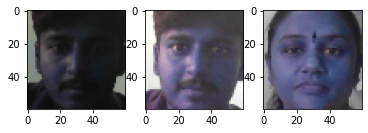

In [140]:
idx = 90
plt.subplot(1,3,1)
plt.imshow(anchor_images[idx])

plt.subplot(1,3,2)
plt.imshow(same_images[idx])

plt.subplot(1,3,3)
plt.imshow(diff_images[idx])